# Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [7]:
print(x_train)
print(x_train.shape)

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]
(15, 1)


In [8]:
print(y_train)
print(y_train.shape)

[[1.7  ]
 [2.76 ]
 [2.09 ]
 [3.19 ]
 [1.694]
 [1.573]
 [3.366]
 [2.596]
 [2.53 ]
 [1.221]
 [2.827]
 [3.465]
 [1.65 ]
 [2.904]
 [1.3  ]]
(15, 1)


In [9]:
# Linear regression mode
model = nn.Linear(input_size, output_size)

In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outputs= model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.2108
Epoch [10/60], Loss: 0.1867
Epoch [15/60], Loss: 0.1770
Epoch [20/60], Loss: 0.1730
Epoch [25/60], Loss: 0.1714
Epoch [30/60], Loss: 0.1707
Epoch [35/60], Loss: 0.1705
Epoch [40/60], Loss: 0.1704
Epoch [45/60], Loss: 0.1703
Epoch [50/60], Loss: 0.1703
Epoch [55/60], Loss: 0.1703
Epoch [60/60], Loss: 0.1703


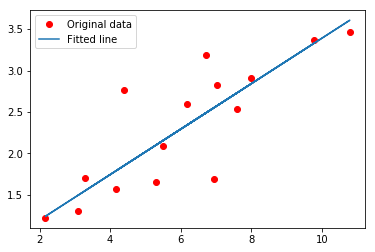

In [12]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [13]:
# Save the model checkpoint
torch.save(model.state_dict(), 'LR_model.ckpt')

### nn.Linear() Learning

In [22]:
layer_x = torch.randn(128, 20)
x_model = nn.Linear(20, 30)
output = x_model(layer_x)

In [17]:
layer_x.size()

torch.Size([128, 20])

In [19]:
x_model.weight.shape

torch.Size([30, 20])

In [20]:
output.shape

torch.Size([128, 30])

In [25]:
x_model.weight.size()

torch.Size([30, 20])

In [27]:
ans = torch.mm(layer_x, x_model.weight.t()) + x_model.bias

In [28]:
ans.shape

torch.Size([128, 30])

In [37]:
x_model.weight.t().shape     # w^T

torch.Size([20, 30])

In [38]:
x_model.weight.shape

torch.Size([30, 20])